In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/'My Drive'/EVA4/Session9
# !pip install -U git+https://github.com/albu/albumentations --no-cache-dir

Mounted at /content/drive
/content/drive/My Drive/EVA4/Session9


In [0]:
import autoreload
%load_ext autoreload
%autoreload
%matplotlib inline
%reload_ext autoreload

import os
import cv2
import torch
import torchvision
import numpy as np

from pdb import set_trace as bp
from google.colab.patches import cv2_imshow
from parse_config import hparam as config
from models import ResNet18
from data import TorchDatasets, BaseDataLoader
from utils import *
from trainer import fit

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
device

device(type='cpu')

In [0]:
%reload_ext autoreload

In [4]:
trainset = TorchDatasets('CIFAR10', './data', True, True).dataset
testset = TorchDatasets('CIFAR10', './data', False, True).dataset

Files already downloaded and verified
Files already downloaded and verified


In [0]:
train_transform_dict = {'HorizontalFlip': {'p': 0.5},
                        'PadIfNeeded': {'min_height': 40, 'min_width': 40}, 
                        'RandomCrop': {'height': 32, 'width': 32},
                        'Normalize': {'mean': (0.5,0.5,0.5), 'std': (0.5,0.5,0.5)}}

test_transform_dict = {'Normalize': {'mean': (0.5,0.5,0.5), 'std': (0.5,0.5,0.5)}}

train_album_compose = getCompose_simple(train_transform_dict)
test_album_compose = getCompose_simple(test_transform_dict)

setattr(trainset, 'transform', train_album_compose)
setattr(testset, 'transform', test_album_compose)

In [0]:
model = ResNet18().to(device)

In [0]:
trainloader = BaseDataLoader(trainset,
                              batch_size=config.train.batch_size,
                              shuffle=config.train.shuffle,
                              num_workers=config.train.loader_workers)
testloader = BaseDataLoader(testset,
                              batch_size=config.val.batch_size,
                              shuffle=config.val.shuffle,
                              num_workers=config.val.loader_workers)              

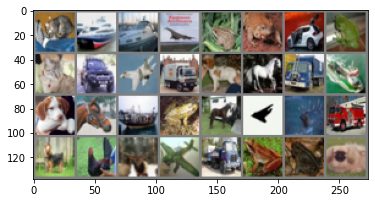

In [8]:
images, labels = iter(testloader).next()
imshow(torchvision.utils.make_grid(images))

In [0]:
print(get_summary(model, (3,32,32)))

In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Printing


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


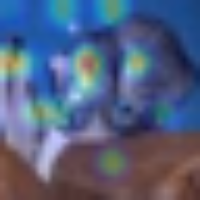

Printing


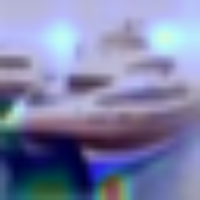

Printing


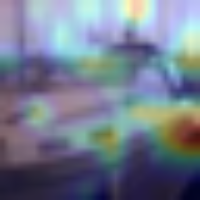

Printing


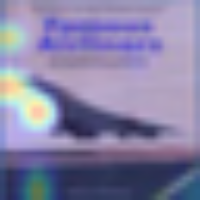

Printing


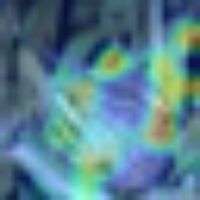

In [10]:
# GradCAM before training, on a few sample images
grad_cam = GradCam(model,
                   target_layer_names=["layer3.1.conv2"],
                   use_cuda=use_cuda)

images, labels = iter(testloader).next()
returned_outputs = grad_cam(images[:5],
         dataset_mean=[0.5, 0.5, 0.5],
         dataset_std=[0.5, 0.5, 0.5],
         index=None)


In [0]:
train_acc, train_losses, test_acc, test_losses, misclassified_list = fit(trainloader,
                                                                          testloader,
                                                                          model,
                                                                          config.train.epochs,
                                                                          optimizer,
                                                                          criterion,
                                                                          device,
                                                                          os.path.join(config.model.snapshot_path, "checkpoint_check"),
                                                                          '/content/drive/My Drive/EVA4/Session9/saves/gradcam_BS64/9.pth')

=> loading checkpoint '/content/drive/My Drive/EVA4/Session9/saves/gradcam_BS64/9.pth'


  0%|          | 0/1563 [00:00<?, ?it/s]

=> loaded checkpoint '/content/drive/My Drive/EVA4/Session9/saves/gradcam_BS64/9.pth' (epoch 8)
EPOCH: 9


Loss=0.3036586344242096 Batch_id=1562 Accuracy=86.35: 100%|██████████| 1563/1563 [06:34<00:00,  3.98it/s]



Test set: Average loss: 0.3965, Accuracy: 8612/10000 (86.12%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 10


Loss=3.9753801822662354 Batch_id=1562 Accuracy=83.91: 100%|██████████| 1563/1563 [06:34<00:00,  3.99it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4759, Accuracy: 8376/10000 (83.76%)

EPOCH: 11


Loss=6.869746685028076 Batch_id=1562 Accuracy=85.06: 100%|██████████| 1563/1563 [06:36<00:00,  4.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4398, Accuracy: 8538/10000 (85.38%)

EPOCH: 12


Loss=6.862683296203613 Batch_id=1562 Accuracy=86.30: 100%|██████████| 1563/1563 [06:34<00:00,  4.01it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4371, Accuracy: 8479/10000 (84.79%)

EPOCH: 13


Loss=11.505304336547852 Batch_id=1562 Accuracy=87.43: 100%|██████████| 1563/1563 [06:35<00:00,  4.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4746, Accuracy: 8439/10000 (84.39%)

EPOCH: 14


Loss=5.177626132965088 Batch_id=1562 Accuracy=87.74: 100%|██████████| 1563/1563 [06:34<00:00,  3.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4095, Accuracy: 8636/10000 (86.36%)

EPOCH: 15


Loss=7.74363374710083 Batch_id=1562 Accuracy=88.46: 100%|██████████| 1563/1563 [06:35<00:00,  3.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3999, Accuracy: 8691/10000 (86.91%)

EPOCH: 16


Loss=6.548006057739258 Batch_id=1562 Accuracy=89.31: 100%|██████████| 1563/1563 [06:35<00:00,  4.02it/s]



Test set: Average loss: 0.3755, Accuracy: 8738/10000 (87.38%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 17


Loss=6.246754169464111 Batch_id=1562 Accuracy=90.10: 100%|██████████| 1563/1563 [06:34<00:00,  4.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.4079, Accuracy: 8719/10000 (87.19%)

EPOCH: 18


Loss=11.767879486083984 Batch_id=1562 Accuracy=90.39: 100%|██████████| 1563/1563 [06:35<00:00,  3.97it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3779, Accuracy: 8770/10000 (87.70%)

EPOCH: 19


Loss=0.22456073760986328 Batch_id=1562 Accuracy=91.15: 100%|██████████| 1563/1563 [06:35<00:00,  3.91it/s]



Test set: Average loss: 0.3655, Accuracy: 8847/10000 (88.47%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 20


Loss=4.704442501068115 Batch_id=1562 Accuracy=91.61: 100%|██████████| 1563/1563 [06:34<00:00,  3.97it/s]



Test set: Average loss: 0.3606, Accuracy: 8870/10000 (88.70%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 21


Loss=6.1173481941223145 Batch_id=1562 Accuracy=92.00: 100%|██████████| 1563/1563 [06:33<00:00,  3.91it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3851, Accuracy: 8849/10000 (88.49%)

EPOCH: 22


Loss=7.297476291656494 Batch_id=1562 Accuracy=92.49: 100%|██████████| 1563/1563 [06:35<00:00,  3.99it/s]



Test set: Average loss: 0.3567, Accuracy: 8891/10000 (88.91%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 23


Loss=7.920609474182129 Batch_id=1562 Accuracy=92.75: 100%|██████████| 1563/1563 [06:36<00:00,  4.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3649, Accuracy: 8916/10000 (89.16%)

EPOCH: 24


Loss=1.161172866821289 Batch_id=1562 Accuracy=93.34: 100%|██████████| 1563/1563 [06:35<00:00,  3.92it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3690, Accuracy: 8927/10000 (89.27%)

EPOCH: 25


Loss=4.258792877197266 Batch_id=1562 Accuracy=93.42: 100%|██████████| 1563/1563 [06:36<00:00,  3.96it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3663, Accuracy: 8913/10000 (89.13%)

EPOCH: 26


Loss=4.252331256866455 Batch_id=1562 Accuracy=94.02: 100%|██████████| 1563/1563 [06:36<00:00,  3.97it/s]



Test set: Average loss: 0.3446, Accuracy: 9003/10000 (90.03%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 27


Loss=1.1191391944885254 Batch_id=1562 Accuracy=94.14: 100%|██████████| 1563/1563 [06:36<00:00,  3.95it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3524, Accuracy: 8951/10000 (89.51%)

EPOCH: 28


Loss=3.5108890533447266 Batch_id=1562 Accuracy=94.46: 100%|██████████| 1563/1563 [06:36<00:00,  3.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.3689, Accuracy: 8967/10000 (89.67%)

EPOCH: 29


Loss=3.3880906105041504 Batch_id=1562 Accuracy=94.44: 100%|██████████| 1563/1563 [06:37<00:00,  3.90it/s]



Test set: Average loss: 0.3335, Accuracy: 9002/10000 (90.02%)


Val loss lowered, saving weights of this epoch!


  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 30


Loss=1.2189254760742188 Batch_id=1562 Accuracy=94.94: 100%|██████████| 1563/1563 [06:35<00:00,  3.94it/s]



Test set: Average loss: 0.3849, Accuracy: 8977/10000 (89.77%)



Printing


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


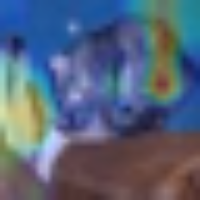

Printing


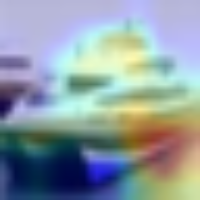

Printing


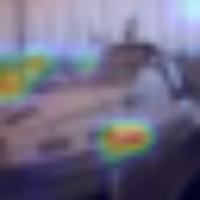

Printing


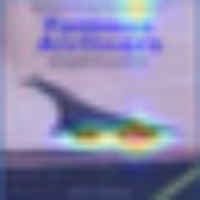

Printing


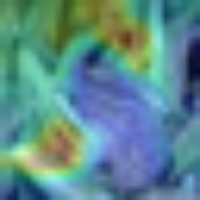

Printing


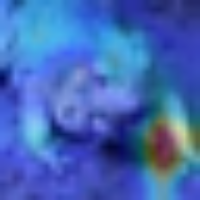

Printing


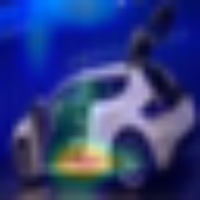

Printing


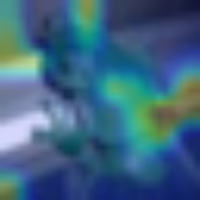

Printing


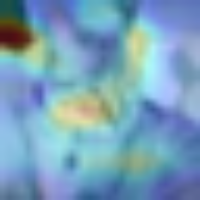

Printing


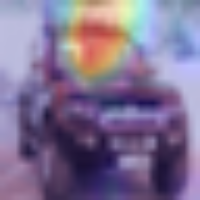

Printing


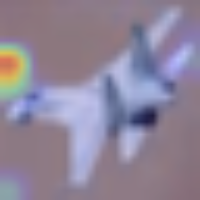

Printing


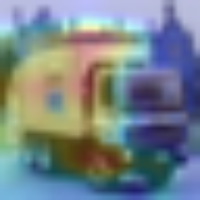

Printing


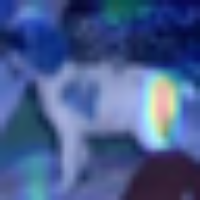

Printing


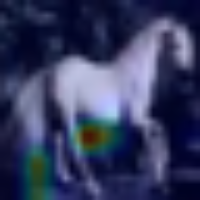

Printing


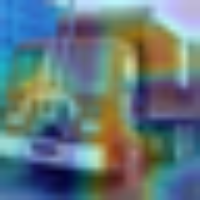

Printing


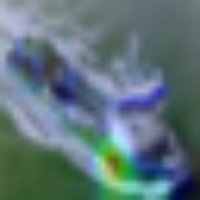

Printing


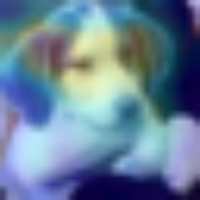

Printing


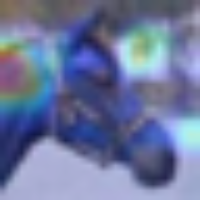

Printing


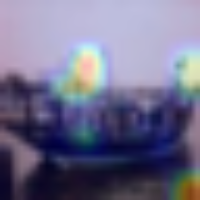

Printing


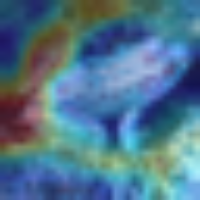

Printing


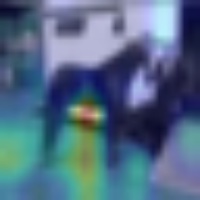

Printing


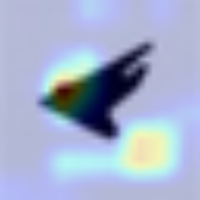

Printing


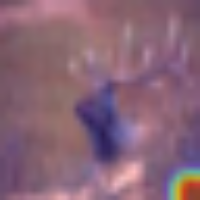

Printing


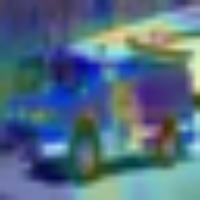

Printing


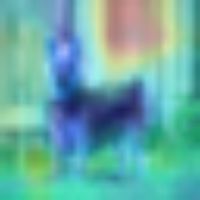

Printing


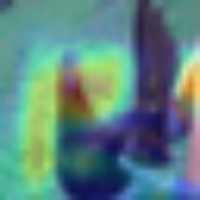

Printing


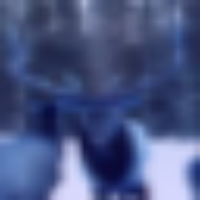

Printing


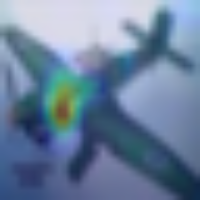

Printing


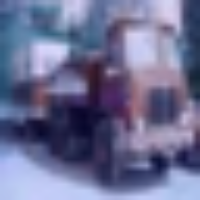

Printing


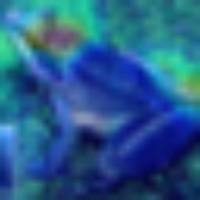

Printing


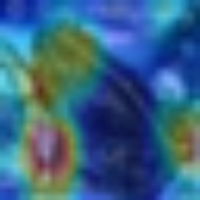

Printing


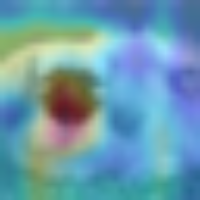

In [12]:
grad_cam = GradCam(model,            
                   target_layer_names=["layer3.1.conv2"],
                   use_cuda=use_cuda,
                   weights_path='/content/drive/My Drive/EVA4/Session9/saves/checkpoint_check/30.pth')

images, labels = iter(testloader).next()
returned_outputs_after_training = grad_cam(images,
                                            dataset_mean=[0.5, 0.5, 0.5],
                                            dataset_std=[0.5, 0.5, 0.5],
                                            index=None)